#  Creación Base de Datos de General

---

In [1]:
# =====================================
# Importación de librerías
# =====================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# =====================================
# Importación de datos
# =====================================
df_peliculas = pd.read_csv("../Parte 1/Puntuaciones/DatosPeliculasSeries.csv")
df_ratings = pd.read_csv("Datos/ratings.csv")
df_links = pd.read_csv("Datos/links.csv")

In [3]:
# =====================================
# Creación base de datos general
# =====================================

df = pd.merge(df_ratings, df_links, on='movieId', how='left')

df = df[["userId", "rating", "timestamp", "imdbId"]].rename(columns={'rating': 'Mi Nota', 'timestamp': 'Fecha', 'imdbId': 'tid'})

df['tid'] = 'tt' + df['tid'].astype(str).str.zfill(7)

df = df[df['tid'].isin(df_peliculas['tid'])].copy()

df["Mi Nota"] *= 2

df["Mi Nota"] = (
    df["Mi Nota"]
        .round()
        .clip(1, 10)
        .astype(int)
)

df['Fecha'] = pd.to_datetime(df['Fecha'], unit='s').dt.date

df

,userId,Mi Nota,Fecha,tid
0,1,8,1999-12-03,tt0114388
1,1,2,1999-12-03,tt0113627
2,1,4,1999-11-22,tt0112682
3,1,10,1999-12-03,tt0115012
4,1,10,1999-11-22,tt0114746
...,...,...,...,...
32000199,200948,9,2011-01-07,tt0446029
32000200,200948,2,2010-10-16,tt1020558
32000201,200948,1,2011-01-07,tt1666186
32000202,200948,7,2012-10-16,tt1285016


In [4]:
# =====================================
# Comprobación de varias puntuaciones por usuario
# =====================================

df_duplicados = df.sort_values(by=["userId", "tid", "Fecha"], ascending=[True, True, False]).copy()

df_duplicados = df_duplicados.drop_duplicates(subset=["userId", "tid"], keep="first")

df_duplicados

,userId,Mi Nota,Fecha,tid
38,1,10,1999-12-01,tt0032143
36,1,10,1999-12-03,tt0033467
33,1,4,1999-11-22,tt0034583
94,1,10,1999-11-22,tt0036868
37,1,10,1999-12-03,tt0042192
...,...,...,...,...
32000196,200948,9,2012-10-16,tt1130884
32000194,200948,9,2012-10-16,tt1193138
32000202,200948,7,2012-10-16,tt1285016
32000203,200948,9,2012-10-16,tt1532503


#  Creación y guardado Bases de Datos de Basicas

---

In [5]:
# =====================================
# Comprobación de usuarios
# =====================================

df_cuenta = df.groupby('userId').size().reset_index(name='count')

df_cuenta

,userId,count
0,1,140
1,2,52
2,3,147
3,4,27
4,5,33
...,...,...
200942,200944,296
200943,200945,108
200944,200946,23
200945,200947,61


In [6]:
# =====================================
# Selección de usuarios
# =====================================

df1 = df[(df["userId"] == 186426)].copy()
df2 = df[(df["userId"] == 105276)].copy()
df3 = df[(df["userId"] == 17281)].copy()
df4 = df[(df["userId"] == 140924)].copy()

In [7]:
df4

,userId,Mi Nota,Fecha,tid
22498501,140924,3,2007-12-03,tt0114709
22498502,140924,9,2007-12-03,tt0113497
22498503,140924,5,2007-12-03,tt0113228
22498504,140924,3,2007-12-03,tt0113277
22498505,140924,1,2007-12-03,tt0114319
...,...,...,...,...
22499365,140924,9,2007-12-03,tt0783233
22499366,140924,7,2007-12-03,tt0779982
22499367,140924,6,2007-12-03,tt0891527
22499368,140924,4,2007-12-03,tt0385752


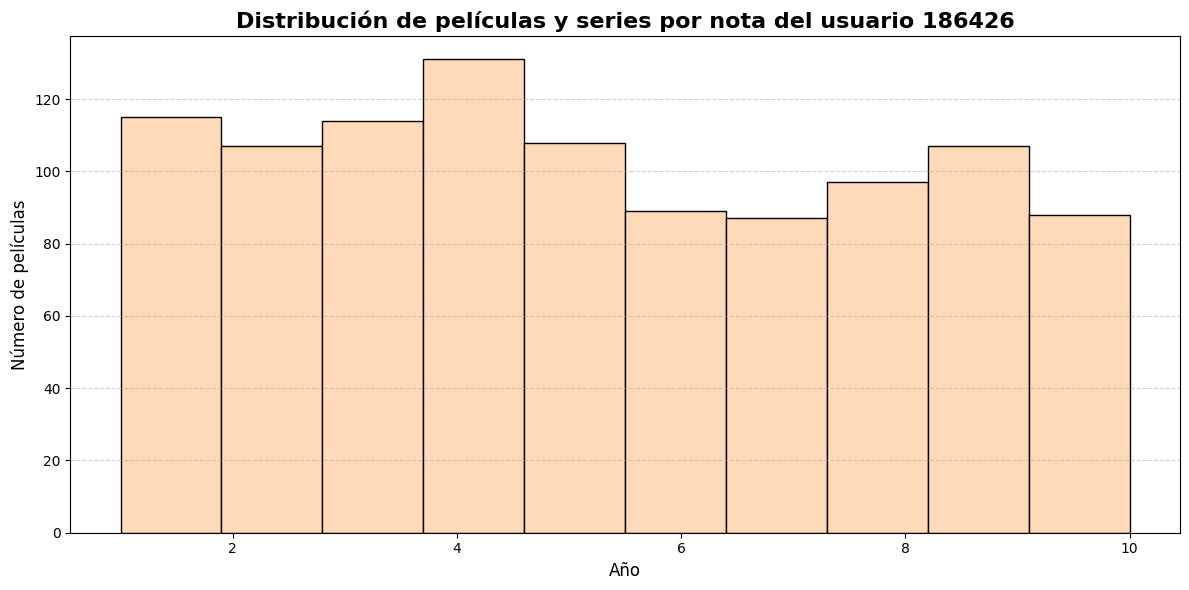

In [15]:
# =====================================
# Distribución de las notas usuario 1
# =====================================

plt.figure(figsize=(12, 6))

plt.hist(
    df1['Mi Nota'],
    edgecolor='black',
    color='peachpuff'
)

plt.title('Distribución de películas y series por nota del usuario 186426', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de películas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

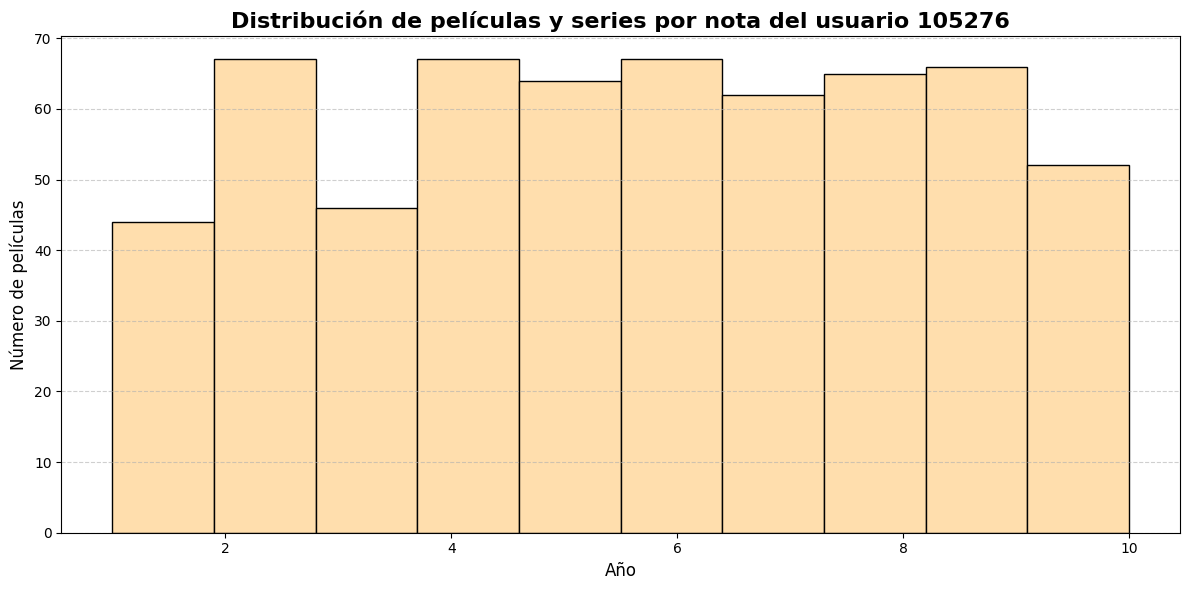

In [16]:
# =====================================
# Distribución de las notas usuario 2
# =====================================

plt.figure(figsize=(12, 6))

plt.hist(
    df2['Mi Nota'],
    edgecolor='black',
    color='navajowhite'
)

plt.title('Distribución de películas y series por nota del usuario 105276', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de películas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

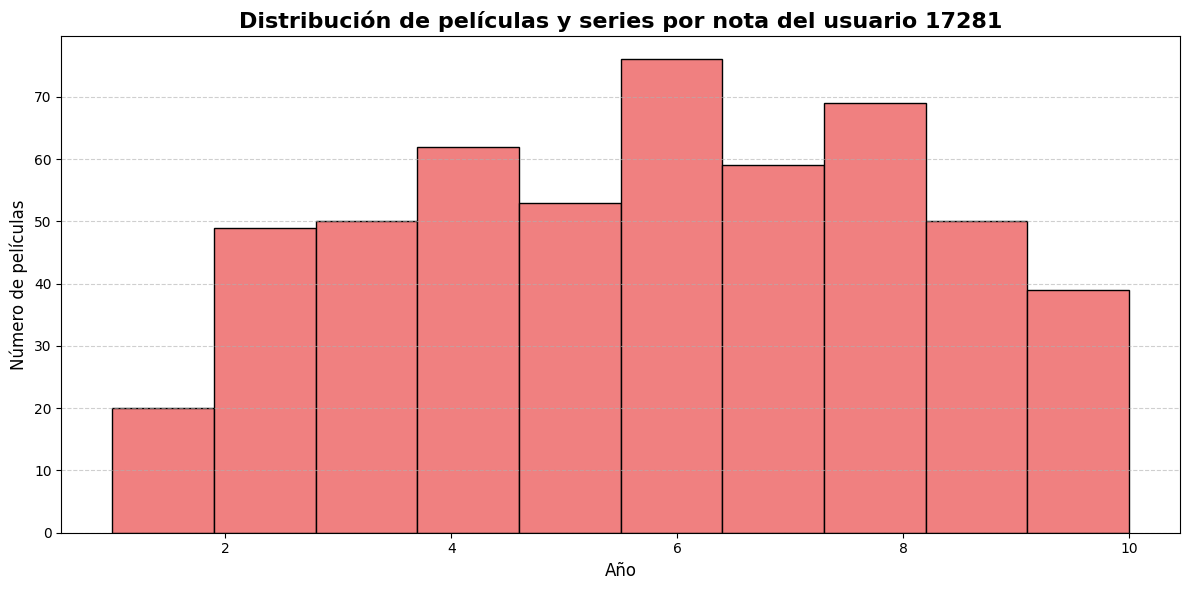

In [17]:
# =====================================
# Distribución de las notas usuario 3
# =====================================

plt.figure(figsize=(12, 6))

plt.hist(
    df3['Mi Nota'],
    edgecolor='black',
    color='lightcoral'
)

plt.title('Distribución de películas y series por nota del usuario 17281', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de películas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

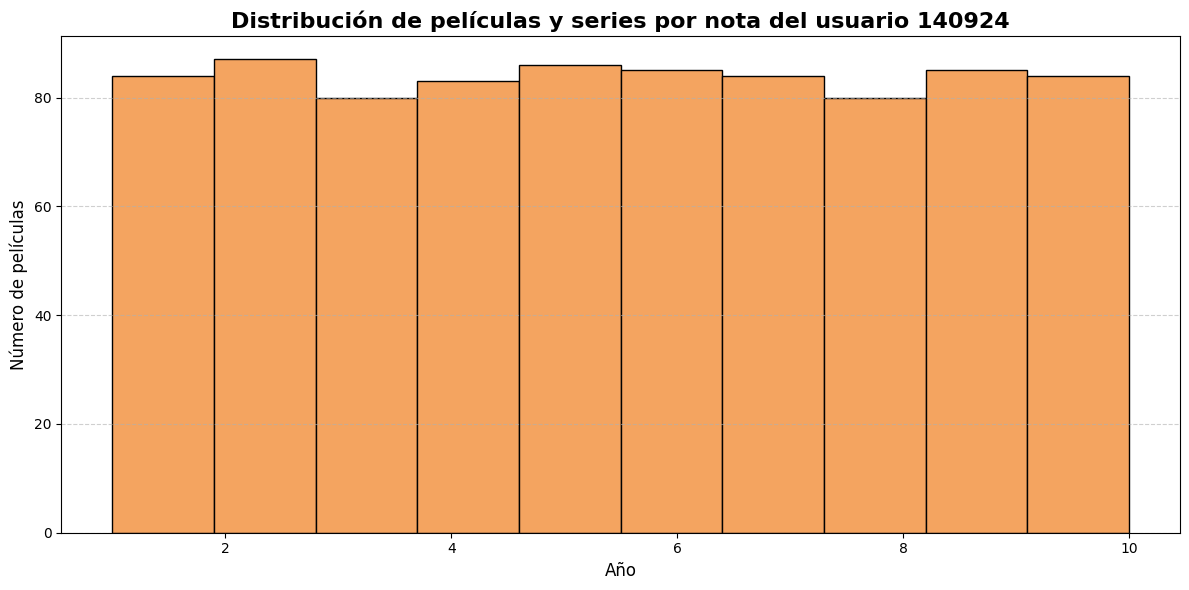

In [18]:
# =====================================
# Distribución de las notas usuario 4
# =====================================

plt.figure(figsize=(12, 6))

plt.hist(
    df4['Mi Nota'],
    edgecolor='black',
    color='sandybrown'
)

plt.title('Distribución de películas y series por nota del usuario 140924', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de películas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [19]:
# =====================================
# Guardado de las bases de datos iniciales
# =====================================

df_inicial = df.copy().drop(columns=["Fecha"])
df1_inicial = df1.copy().drop(columns=["Fecha"])
df2_inicial = df2.copy().drop(columns=["Fecha"])
df3_inicial = df3.copy().drop(columns=["Fecha"])
df4_inicial = df4.copy().drop(columns=["Fecha"])

df_inicial.to_csv("Puntuaciones/general.csv", index=False)
df1_inicial.to_csv("Puntuaciones/186426.csv", index=False)
df2_inicial.to_csv("Puntuaciones/105276.csv", index=False)
df3_inicial.to_csv("Puntuaciones/17281.csv", index=False)
df4_inicial.to_csv("Puntuaciones/140924.csv", index=False)

#  Creación y guardado Bases de Datos de Completas

---

In [20]:
# =====================================
# Creación de las bases de datos finales
# =====================================

df1_completo = df1.merge(df_peliculas, on='tid', how='left')
df2_completo = df2.merge(df_peliculas, on='tid', how='left')
df3_completo = df3.merge(df_peliculas, on='tid', how='left')
df4_completo = df4.merge(df_peliculas, on='tid', how='left')

df1_completo = df1_completo[['userId', 'tid', 'Fecha', 'Tipo', 'Titulo', 'Titulo_ES', 'Año', 'Mi Nota', 'Duracion', 'Generos', 'Puntuacion', 'Num_Votos', 'Actores', 'Directores', 'Idioma']].dropna().copy()
df2_completo = df2_completo[['userId', 'tid', 'Fecha', 'Tipo', 'Titulo', 'Titulo_ES', 'Año', 'Mi Nota', 'Duracion', 'Generos', 'Puntuacion', 'Num_Votos', 'Actores', 'Directores', 'Idioma']].dropna().copy()
df3_completo = df3_completo[['userId', 'tid', 'Fecha', 'Tipo', 'Titulo', 'Titulo_ES', 'Año', 'Mi Nota', 'Duracion', 'Generos', 'Puntuacion', 'Num_Votos', 'Actores', 'Directores', 'Idioma']].dropna().copy()
df4_completo = df4_completo[['userId', 'tid', 'Fecha', 'Tipo', 'Titulo', 'Titulo_ES', 'Año', 'Mi Nota', 'Duracion', 'Generos', 'Puntuacion', 'Num_Votos', 'Actores', 'Directores', 'Idioma']].dropna().copy()

In [21]:
# =====================================
# Guardado de las bases de datos finales
# =====================================

df1_completo.to_csv("Puntuaciones/186426_completo.csv", index=False)
df2_completo.to_csv("Puntuaciones/105276_completo.csv", index=False)
df3_completo.to_csv("Puntuaciones/17281_completo.csv", index=False)
df4_completo.to_csv("Puntuaciones/140924_completo.csv", index=False)